# Sales Analysis

## Import needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Taks 1 : Merge 12 month data (currently in 12 different files) into a single file

In [2]:
DATA_FOLDER = 'SalesData/'
csv_files = os.listdir(DATA_FOLDER)
full_data_file_name = 'full_data.csv'

print('CSV files: ', csv_files)

def read_csv(filename):
    df = pd.read_csv(filename)
    print('Read : ', filename)
    print('Columns: ', df.columns)
    print('Rows: ', len(df.index))
    return df

CSV files:  ['Sales_May_2019.csv', 'Sales_September_2019.csv', 'Sales_January_2019.csv', 'Sales_March_2019.csv', 'Sales_October_2019.csv', 'Sales_July_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'full_data.csv', 'Sales_June_2019.csv', 'Sales_November_2019.csv']


In [3]:
all_data = pd.concat([read_csv(DATA_FOLDER + fn) for fn in os.listdir(DATA_FOLDER) if fn != full_data_file_name])

Read :  SalesData/Sales_May_2019.csv
Columns:  Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
Rows:  16635
Read :  SalesData/Sales_September_2019.csv
Columns:  Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
Rows:  11686
Read :  SalesData/Sales_January_2019.csv
Columns:  Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
Rows:  9723
Read :  SalesData/Sales_March_2019.csv
Columns:  Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
Rows:  15226
Read :  SalesData/Sales_October_2019.csv
Columns:  Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
Rows:  20379
Read :  SalesData/Sales_July_2019.csv
Columns

## Data cleaning
We have some rows with values equals to column names and some empty rows

For example in Sales_May_2019.csv row with number 964 is: <br/>

<Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address>

In [4]:
print(all_data.columns)
def filter_fn(row):
    return all([row[cn] != cn for cn in all_data.columns])
    
cond = all_data.apply(filter_fn, axis=1)
cond

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


0        True
1        True
2        True
3        True
4        True
         ... 
17656    True
17657    True
17658    True
17659    True
17660    True
Length: 186850, dtype: bool

In [5]:
%load_ext jupyternotify

%notify

# Clean up empty rows
column_names = all_data.columns
rows_before = all_data.shape[0]
print('Rows before: ', rows_before)
all_data = all_data.dropna(how='all')
cond = all_data.apply(filter_fn, axis=1)
all_data = all_data[cond]
rows_after = all_data.shape[0]
print('Rows after: ', rows_after)
print('Deleted rows: ', (rows_before - rows_after))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Rows before:  186850
Rows after:  185950
Deleted rows:  900


## Save clean data to new file

In [6]:
all_data.to_csv(DATA_FOLDER + full_data_file_name)

### Read the data from the newly created file

In [7]:
all_data = pd.read_csv(DATA_FOLDER + full_data_file_name)
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


## Question 1: What was the best month for sale? How much was earned that month?

In [8]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [9]:
all_data.dtypes

Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Add sales column which will be equal to Quantity ordered * Price Each

First let's check if we have Quantity ordered which is less than 1

In [10]:
all_data[all_data['Quantity Ordered'] < 1]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
all_data['Total Price'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",11.99
1,1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",3.84
2,2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",149.99
3,3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",11.99
4,4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5.98


In [14]:
# Statistics for months
import calendar

month_stats = all_data[['Order Date', 'Total Price']].groupby(all_data['Order Date'].dt.month)['Total Price']\
    .agg(['sum', 'count', 'min', 'max']).reset_index().rename(columns={'Order Date': 'Month'})
month_stats['Month'] = month_stats['Month'].apply(lambda m: calendar.month_name[m])
month_stats

,Month,sum,count,min,max
0,January,1822256.73,9709,2.99,1999.98
1,February,2202022.42,11975,2.99,1700.00
2,March,2807100.38,15153,2.99,1700.00
3,April,3390670.24,18279,2.99,3400.00
4,May,3152606.75,16566,2.99,3400.00
5,June,2577802.26,13554,2.99,3400.00
6,July,2647775.76,14293,2.99,1700.00
7,August,2244467.88,11961,2.99,1700.00
8,September,2097560.13,11621,2.99,1700.00
9,October,3736726.88,20282,2.99,1999.98


### Plot monthly sums

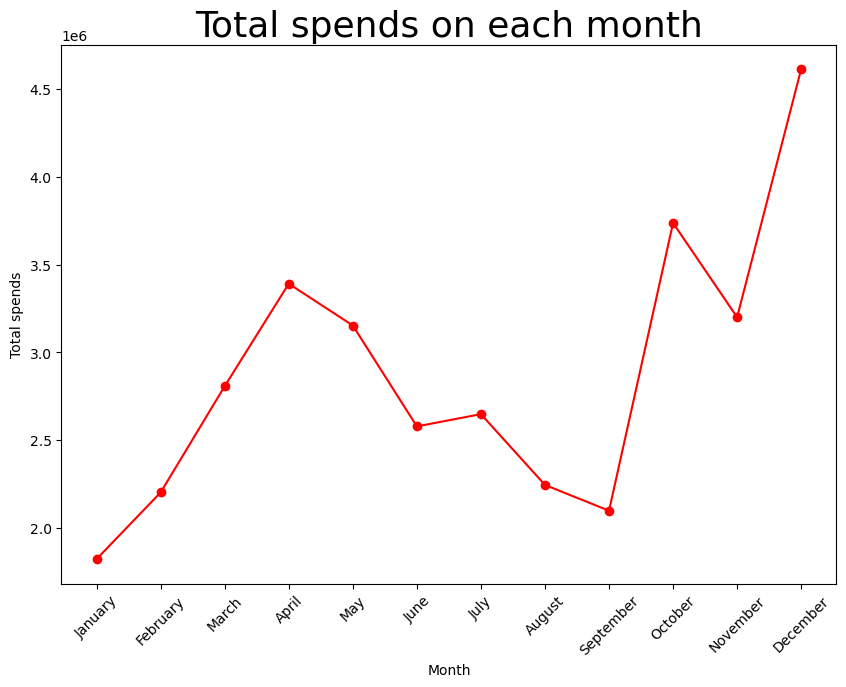

In [17]:
# Resize graph (dpi specifies pixels per inch)
plt.figure(figsize=(10,7), dpi=100)

plt.xlabel('Month')
plt.ylabel('Total spends')

plt.title('Total spends on each month', fontdict={'fontname': 'Arial', 'fontsize': 26})
plt.plot(month_stats['Month'], month_stats['sum'], c='red', marker='o')
plt.xticks(rotation = 45)

plt.show()

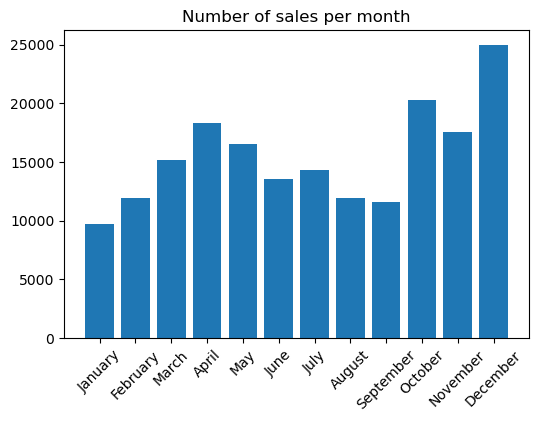

In [16]:
plt.figure(figsize=(6,4), dpi=100)
plt.bar(month_stats['Month'], month_stats['count'])
plt.title('Number of sales per month')
plt.xticks(rotation = 45)
plt.show()

## What city had the highest number of sales?

In [49]:
def extract_city(address):
    if not address:
        return ''
    splits = address.split(',')
    if len(splits) < 2:
        return ''
    return splits[1].strip()

def extract_state(address):
    if not address:
        return ''
    splits = address.split(',')
    if len(splits) < 3:
        return ''
    return splits[2].strip()[:2]

all_data['City'] = all_data['Purchase Address'].apply(extract_city)
all_data['State'] = all_data['Purchase Address'].apply(extract_state)
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,City,State
0,0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",11.99,New York City,NY
1,1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",3.84,Dallas,TX
2,2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",149.99,New York City,NY
3,3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",11.99,Dallas,TX
4,4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5.98,Seattle,WA


In [51]:
city_stats = all_data[['City', 'State', 'Total Price']].groupby(['City', 'State']).agg(['sum', 'count', 'min', 'max']).reset_index()
city_stats

City State Total Price                     
                               sum  count   min     max
0        Atlanta    GA  2795498.58  14881  2.99  1700.0
1         Austin    TX  1819581.75   9905  2.99  1700.0
2         Boston    MA  3661642.01  19934  2.99  3400.0
3         Dallas    TX  2767975.40  14820  2.99  1700.0
4    Los Angeles    CA  5452570.80  29605  2.99  1700.0
5  New York City    NY  4664317.43  24876  2.99  3400.0
6       Portland    ME   449758.27   2455  2.99  1700.0
7       Portland    OR  1870732.34  10010  2.99  1700.0
8  San Francisco    CA  8262203.91  44732  2.99  3400.0
9        Seattle    WA  2747755.48  14732  2.99  1700.0

### Plot cities statistics

In [52]:
city_stats.columns

MultiIndex([(       'City',      ''),
            (      'State',      ''),
            ('Total Price',   'sum'),
            ('Total Price', 'count'),
            ('Total Price',   'min'),
            ('Total Price',   'max')],
           )

In [57]:
sorter_by_count = city_stats.sort_values(('Total Price', 'count'), ascending=False)
#add column to display cumulative percentage
sorter_by_count['cumperc'] = sorter_by_count[('Total Price', 'count')].cumsum()/sorter_by_count[('Total Price', 'count')].sum()*100
sorter_by_count['Full City name'] = sorter_by_count['City'] + ' ' + sorter_by_count['State']
sorter_by_count

City State Total Price                          cumperc  \
                               sum  count   min     max               
8  San Francisco    CA  8262203.91  44732  2.99  3400.0   24.055929   
4    Los Angeles    CA  5452570.80  29605  2.99  1700.0   39.976876   
5  New York City    NY  4664317.43  24876  2.99  3400.0   53.354665   
2         Boston    MA  3661642.01  19934  2.99  3400.0   64.074751   
0        Atlanta    GA  2795498.58  14881  2.99  1700.0   72.077440   
3         Dallas    TX  2767975.40  14820  2.99  1700.0   80.047325   
9        Seattle    WA  2747755.48  14732  2.99  1700.0   87.969884   
7       Portland    OR  1870732.34  10010  2.99  1700.0   93.353052   
1         Austin    TX  1819581.75   9905  2.99  1700.0   98.679753   
6       Portland    ME   449758.27   2455  2.99  1700.0  100.000000   

     Full City name  
                     
8  San Francisco CA  
4    Los Angeles CA  
5  New York City NY  
2         Boston MA  
0        Atlanta GA  
3         Dallas TX  
9        Seattle WA  
7       Portland OR  
1         Austin TX  
6       Portland ME

<Figure size 600x400 with 0 Axes>

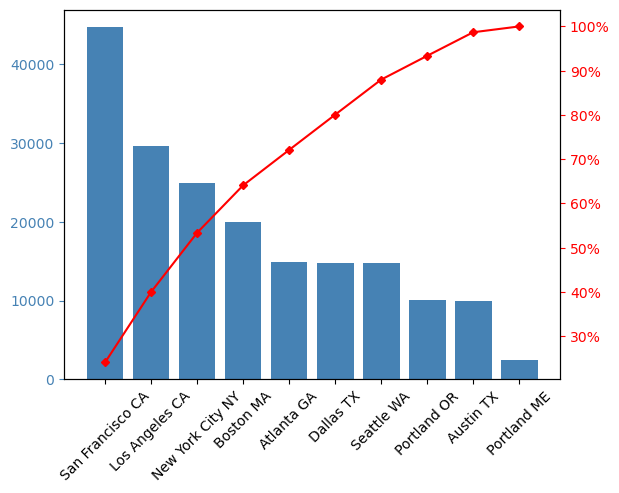

In [60]:
from matplotlib.ticker import PercentFormatter 

plt.figure(figsize=(6,4), dpi=100)

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(sorter_by_count['Full City name'], sorter_by_count[('Total Price', 'count')], color=color1)
plt.xticks(rotation=45)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(sorter_by_count['Full City name'], sorter_by_count['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.show()

## What time should we display advertisment to maximize likelihood of customer's buying product?

In [61]:
all_data.dtypes

Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Total Price                float64
City                        object
State                       object
dtype: object

In [82]:
# Aggregate the data by hours
hour_stats = all_data[['Order Date']].groupby(all_data['Order Date'].dt.hour).agg(['count']).reset_index()
# Just for visualization
hour_stats[('Order Date',      '')] = hour_stats[('Order Date',      '')].apply(lambda x: '{:02d}'.format(x) + ':00')
hour_stats

Order Date       
               count
0       00:00   3910
1       01:00   2350
2       02:00   1243
3       03:00    831
4       04:00    854
5       05:00   1321
6       06:00   2482
7       07:00   4011
8       08:00   6256
9       09:00   8748
10      10:00  10944
11      11:00  12411
12      12:00  12587
13      13:00  12129
14      14:00  10984
15      15:00  10175
16      16:00  10384
17      17:00  10899
18      18:00  12280
19      19:00  12905
20      20:00  12228
21      21:00  10921
22      22:00   8822
23      23:00   6275

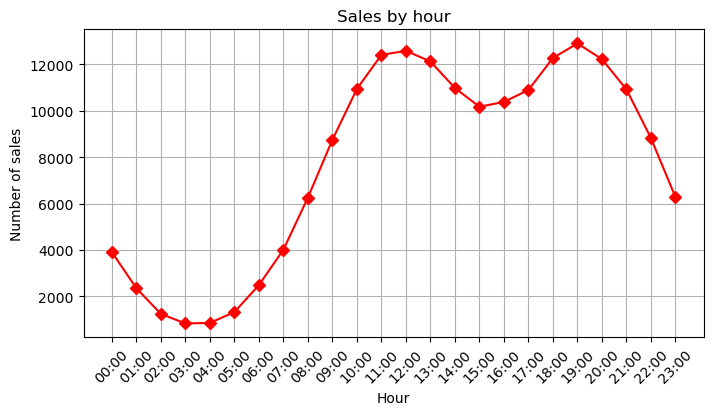

In [85]:
plt.figure(figsize=(8,4), dpi=100)

plt.xticks(rotation=45)
plt.title('Sales by hour')
plt.xlabel('Hour')
plt.ylabel('Number of sales')
plt.grid()
plt.plot(hour_stats[('Order Date', '')], hour_stats[('Order Date', 'count')], color='red', marker="D")

plt.show()

## What products are often sell toghether? 

In [87]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,City,State
0,0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",11.99,New York City,NY
1,1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",3.84,Dallas,TX
2,2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",149.99,New York City,NY
3,3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",11.99,Dallas,TX
4,4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5.98,Seattle,WA


In [124]:
# Find all orders with 2 or more Products
multi_product_orders = all_data['Order ID'].value_counts()
multi_product_orders

160873    5
194253    4
312462    4
178158    4
193511    4
         ..
269230    1
269231    1
269232    1
269233    1
295664    1
Name: Order ID, Length: 178437, dtype: int64

In [134]:
products = all_data[all_data['Order ID'].isin(multi_product_orders.index[multi_product_orders.gt(1)])]
products = products[['Order ID', 'Product']].sort_values(by=['Order ID', 'Product'])
product_lists = products.groupby('Order ID').agg(lambda x: '|'.join(x))
product_lists['Product'] = product_lists['Product'].apply(lambda x: sorted(x.split('|')))
product_lists

,Product
Order ID,
141275,"[USB-C Charging Cable, Wired Headphones]"
141290,"[AA Batteries (4-pack), Apple Airpods Headphones]"
141365,"[Vareebadd Phone, Wired Headphones]"
141384,"[Google Phone, USB-C Charging Cable]"
141450,"[Bose SoundSport Headphones, Google Phone]"
...,...
319536,"[Macbook Pro Laptop, Wired Headphones]"
319556,"[Google Phone, Wired Headphones]"
319584,"[Wired Headphones, iPhone]"


In [142]:
def all_possible_pairs(x):
    return [(a, b) for idx, a in enumerate(x) for b in x[idx + 1:]]

pairs = product_lists['Product'].apply(lambda x: all_possible_pairs(x))

Order ID
141275           [(USB-C Charging Cable, Wired Headphones)]
141290    [(AA Batteries (4-pack), Apple Airpods Headpho...
141365                [(Vareebadd Phone, Wired Headphones)]
141384               [(Google Phone, USB-C Charging Cable)]
141450         [(Bose SoundSport Headphones, Google Phone)]
                                ...                        
319536             [(Macbook Pro Laptop, Wired Headphones)]
319556                   [(Google Phone, Wired Headphones)]
319584                         [(Wired Headphones, iPhone)]
319596                 [(Lightning Charging Cable, iPhone)]
319631    [(34in Ultrawide Monitor, Lightning Charging C...
Name: Product, Length: 7136, dtype: object

In [146]:
possible_pairs = pairs.explode()
possible_pairs.value_counts()

(Lightning Charging Cable, iPhone)              1015
(Google Phone, USB-C Charging Cable)             999
(Wired Headphones, iPhone)                       462
(Google Phone, Wired Headphones)                 423
(Apple Airpods Headphones, iPhone)               373
                                                ... 
(27in FHD Monitor, LG Washing Machine)             1
(LG Dryer, Wired Headphones)                       1
(Google Phone, LG Dryer)                           1
(34in Ultrawide Monitor, LG Washing Machine)       1
(Google Phone, LG Washing Machine)                 1
Name: Product, Length: 175, dtype: int64

## Second approach: What products are often sell toghether?

In [148]:
products1 = all_data[['Order ID', 'Product']]
products2 = all_data[['Order ID', 'Product']]

products1 = products1.rename(columns={'Product': 'Product1'})
products2 = products2.rename(columns={'Product': 'Product2'})

print(products1.head())
print(products2.head())

   Order ID                Product1
0    194095        Wired Headphones
1    194096   AA Batteries (4-pack)
2    194097        27in FHD Monitor
3    194098        Wired Headphones
4    194099  AAA Batteries (4-pack)
   Order ID                Product2
0    194095        Wired Headphones
1    194096   AA Batteries (4-pack)
2    194097        27in FHD Monitor
3    194098        Wired Headphones
4    194099  AAA Batteries (4-pack)


In [154]:
# Join them on Order ID
merged_prod = pd.merge(products1, products2, on='Order ID', how='inner')
# Remove duplicates
merged_prod = merged_prod[merged_prod['Product1'] != merged_prod['Product2']]

In [162]:
# As all pairs are presented 2 times. We will leave only these where Product1 > Product2 (by alphabetical order)
rows_before = merged_prod.shape[0]
print('Rows before: ', rows_before)
merged_prod = merged_prod[merged_prod['Product1'] > merged_prod['Product2']]
rows_after = merged_prod.shape[0]
print('Rows after: ', rows_after)
print('Deleted rows: ', (rows_before - rows_after))
merged_prod.head()

Rows before:  15198
Rows after:  7599
Deleted rows:  7599


,Order ID,Product1,Product2
17,194110,Wired Headphones,Google Phone
80,194170,USB-C Charging Cable,Google Phone
86,194174,iPhone,Lightning Charging Cable
87,194174,iPhone,Wired Headphones
92,194174,Wired Headphones,Lightning Charging Cable


In [179]:
counts_pairs = merged_prod.groupby(['Product1', 'Product2']).agg('count').reset_index()
counts_pairs.rename(columns={'Order ID': 'count'}).sort_values(by='count', ascending=False)

,Product1,Product2,count
153,iPhone,Lightning Charging Cable,1015
107,USB-C Charging Cable,Google Phone,999
158,iPhone,Wired Headphones,462
134,Wired Headphones,Google Phone,423
148,iPhone,Apple Airpods Headphones,373
...,...,...,...
51,LG Dryer,Google Phone,1
50,LG Dryer,Flatscreen TV,1
108,USB-C Charging Cable,LG Dryer,1
121,Vareebadd Phone,LG Dryer,1


## Third approach. Grouping by Order ID

In [195]:
duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicated['Grouped'] = duplicated.groupby('Order ID')['Product']\
    .transform(lambda x: '|'.join(x))
grouped_orders = duplicated[['Order ID', 'Grouped']].drop_duplicates()
grouped_orders.head()

/tmp/ipykernel_4112/2478307200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated['Grouped'] = duplicated.groupby('Order ID')['Product']\


,Order ID,Grouped
15,194110,Google Phone|Wired Headphones
76,194170,Google Phone|USB-C Charging Cable
81,194174,iPhone|Lightning Charging Cable|Wired Headphones
88,194179,Flatscreen TV|AAA Batteries (4-pack)
102,194192,Wired Headphones|Bose SoundSport Headphones


In [197]:
from itertools import combinations
from collections import Counter

counter = Counter()

for r in grouped_orders['Grouped']:
    row_list = r.split('|')
    counter.update(Counter(combinations(row_list, 2)))
    
print(counter.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


## What product sold the most?

In [210]:
products = all_data[['Product', 'Quantity Ordered']].groupby('Product').sum().reset_index()
products.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


In [211]:
products = products.sort_values('Quantity Ordered', ascending=False)
products

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


In [215]:
prices = all_data.groupby('Product').mean()['Price Each'].reset_index()
prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


In [218]:
prod_stats = products.merge(prices, on='Product', how='left')
prod_stats

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


## Plot the data

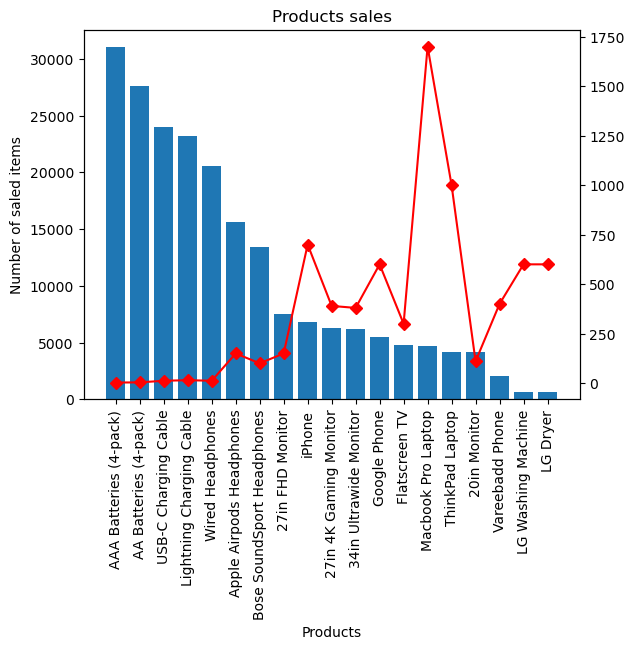

In [228]:
#create basic bar plot
fig, ax = plt.subplots()
ax.bar(prod_stats['Product'], prod_stats['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Number of saled items')
plt.title('Products sales')

#add mean price line to plot
ax2 = ax.twinx()
ax2.plot(prod_stats['Product'], prod_stats['Price Each'], color='r', marker="D")

plt.show()

In [216]:
products['Product']

5         AAA Batteries (4-pack)
4          AA Batteries (4-pack)
15          USB-C Charging Cable
12      Lightning Charging Cable
17              Wired Headphones
6       Apple Airpods Headphones
7     Bose SoundSport Headphones
2               27in FHD Monitor
18                        iPhone
1         27in 4K Gaming Monitor
3         34in Ultrawide Monitor
9                   Google Phone
8                  Flatscreen TV
13            Macbook Pro Laptop
14               ThinkPad Laptop
0                   20in Monitor
16               Vareebadd Phone
11            LG Washing Machine
10                      LG Dryer
Name: Product, dtype: object

## Retry second approach with merging dataframes

I found that in an order we can have duplicate elements. This time I will remove these duplicated items and try to merge dataframes.

In [229]:
full_data = pd.read_csv(DATA_FOLDER + full_data_file_name)

# Find all orders with 2 or more Products
product_orders_counts = full_data['Order ID'].value_counts()
product_orders_counts

160873    5
194253    4
312462    4
178158    4
193511    4
         ..
269230    1
269231    1
269232    1
269233    1
295664    1
Name: Order ID, Length: 178437, dtype: int64

In [232]:
# Get only products with Orders with 2 or more products in it
mv_data = full_data[full_data.duplicated(subset=['Order ID'], keep=False)]
print('Data shape: ', mv_data.shape)
mv_data.head()

Data shape:  (14649, 7)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15,15,194110,Google Phone,1,600.00,05/31/19 18:07,"498 14th St, Los Angeles, CA 90001"
16,16,194110,Wired Headphones,1,11.99,05/31/19 18:07,"498 14th St, Los Angeles, CA 90001"
76,77,194170,Google Phone,1,600.00,05/30/19 12:30,"711 Maple St, San Francisco, CA 94016"
77,78,194170,USB-C Charging Cable,2,11.95,05/30/19 12:30,"711 Maple St, San Francisco, CA 94016"
81,82,194174,iPhone,1,700.00,05/04/19 23:08,"37 North St, Seattle, WA 98101"


In [254]:
# Merging strategy
prod1 = mv_data[['Order ID', 'Product']].drop_duplicates().rename(columns={'Product': 'Product1'})
prod2 = mv_data[['Order ID', 'Product']].drop_duplicates().rename(columns={'Product': 'Product2'})

merged = prod1.merge(prod2, on='Order ID', how='inner')
merged = merged[(merged['Product1'] > merged['Product2'])]
merged.head()

,Order ID,Product1,Product2
2,194110,Wired Headphones,Google Phone
6,194170,USB-C Charging Cable,Google Phone
9,194174,iPhone,Lightning Charging Cable
10,194174,iPhone,Wired Headphones
15,194174,Wired Headphones,Lightning Charging Cable


In [264]:
# Verify value counts 
def comb_of_2(n):
    return (n * (n - 1)) / 2

val_counts = merged['Order ID'].value_counts()
# Some orders have 1 element 2 times
prod_order_counts = full_data[['Order ID', 'Product']].drop_duplicates()['Order ID'].value_counts()

for idx, val in val_counts.items():
    orig_count = prod_order_counts[idx]
    comb = comb_of_2(orig_count)
    if val != comb:
        print('Inconsistency for order id: ', idx, ' expected: ', comb, ' but has: ', val)

In [272]:
pair_products = merged.groupby(['Product1', 'Product2']).count().reset_index()
pair_products = pair_products.sort_values(by='Order ID', ascending=False)
pair_products

,Product1,Product2,Order ID
153,iPhone,Lightning Charging Cable,1011
107,USB-C Charging Cable,Google Phone,997
158,iPhone,Wired Headphones,462
134,Wired Headphones,Google Phone,422
148,iPhone,Apple Airpods Headphones,373
...,...,...,...
51,LG Dryer,Google Phone,1
50,LG Dryer,Flatscreen TV,1
108,USB-C Charging Cable,LG Dryer,1
121,Vareebadd Phone,LG Dryer,1


In [276]:
full_data[full_data['Order ID'] == 312462]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
105084,17577,312462,iPhone,1,700.00,12/08/19 13:19,"210 Spruce St, San Francisco, CA 94016"
105085,17578,312462,Lightning Charging Cable,1,14.95,12/08/19 13:19,"210 Spruce St, San Francisco, CA 94016"
105086,17579,312462,Apple Airpods Headphones,2,150.00,12/08/19 13:19,"210 Spruce St, San Francisco, CA 94016"
105087,17580,312462,Wired Headphones,1,11.99,12/08/19 13:19,"210 Spruce St, San Francisco, CA 94016"
